In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import norm

## Процедура генерации  случайных величин

In [2]:
x = np.linspace(-5, 7, 100)

Требуется смоделировать СВ с распределением $p(x)$ (смесь двух гауссовских СВ), причем эта плотность неотнормирована.

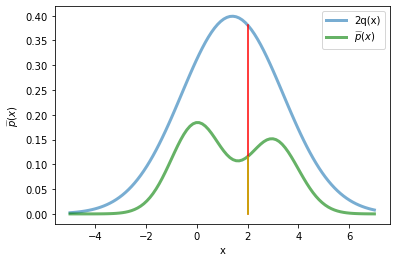

In [3]:
descr_for_density_fun = '$\\widetilde{p}(x)$'


def p(x, Z=1.2):
    w = 0.55
    # Z - вводим коэффициент, чтобы распределение было ненормированным 
    return (w*norm.pdf(x) + (1-w)*norm.pdf(x, loc=3, scale=1))/Z

def q(x):
    return norm.pdf(x, loc=1.4, scale=2)

coeff = 2
fig, ax = plt.subplots(1, 1)
ax.plot(x, coeff*q(x), lw=3, alpha=0.6, label=f'{coeff}q(x)')
ax.plot(x, p(x), lw=3, alpha=0.6, label=f'{descr_for_density_fun}', color='g')
ax.plot([2,2], [0,coeff*q(2)],'r')
ax.plot([2,2], [0,p(2)],'y')
ax.set_xlabel('x')
ax.set_ylabel(f'{descr_for_density_fun}')
ax.legend()
fig.savefig('1d_rand.png')

In [4]:
def gen_points(p, q, coeff, N=3000):
    x = np.random.normal(loc=1.4, scale=2, size=N)   
    res = []
    points_all = []
    points_p = []
    for el in x:
        y = np.random.rand()*coeff*q(el)
        #print(y)
        if y<p(el):
            res.append(el)
            points_p.append([el,y])
        points_all.append([el, y])
    return res, points_all, points_p 



In [5]:
res, points, p_points = gen_points(p, q, coeff)
print(f'Сгенерировано: {len(res)}, Отвергнуто: {len(points) - len(res)}, Всего: {len(points)}')

Сгенерировано: 1223, Отвергнуто: 1777, Всего: 3000


In [6]:
#list(zip(*points))

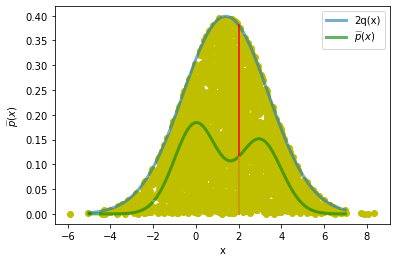

In [7]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, coeff*q(x), lw=3, alpha=0.6, label=f'{coeff}q(x)')
ax.plot(x, p(x), lw=3, alpha=0.6, label=f'{descr_for_density_fun}', color='g')
ax.plot([2,2], [0,coeff*q(2)],'r')
ax.plot([2,2], [0,p(2)],'y')
ax.scatter(list(zip(*points))[0], list(zip(*points))[1], color='y')
ax.set_xlabel('x')
ax.set_ylabel(f'{descr_for_density_fun}')
ax.legend()
fig.savefig('1d_rand_p.png')

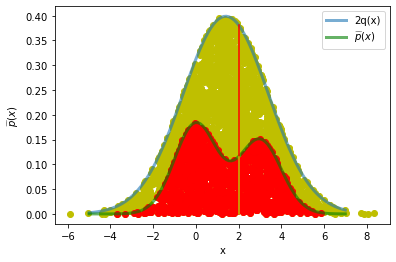

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, coeff*q(x), lw=3, alpha=0.6, label=f'{coeff}q(x)')
ax.plot(x, p(x), lw=3, alpha=0.6, label=f'{descr_for_density_fun}', color='g')
ax.plot([2,2], [0,coeff*q(2)],'r')
ax.plot([2,2], [0,p(2)],'y')
ax.scatter(list(zip(*points))[0], list(zip(*points))[1], color='y')
ax.scatter(list(zip(*p_points))[0], list(zip(*p_points))[1], color='r')
ax.set_xlabel('x')
ax.set_ylabel(f'{descr_for_density_fun}')
ax.legend()
fig.savefig('1d_rand_p_p.png')

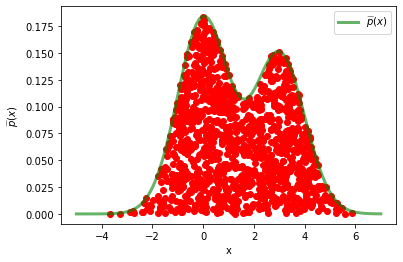

In [9]:
fig, ax = plt.subplots(1, 1)
#ax.plot(x, 2*q(x), lw=3, alpha=0.6, label='2q(x)')
ax.plot(x, p(x), lw=3, alpha=0.6, label=f'{descr_for_density_fun}', color='g')
#ax.plot([2,2], [0,2*q(2)],'r')
#ax.plot([2,2], [0,p(2)],'y')
#ax.scatter(list(zip(*points))[0], list(zip(*points))[1], color='y')
ax.scatter(list(zip(*p_points))[0], list(zip(*p_points))[1], color='r')
ax.set_xlabel('x')
ax.set_ylabel(f'{descr_for_density_fun}')
ax.legend()
fig.savefig('1d_rand_4.png')

In [10]:
#res = gen_points(p,q)
#print(len(res))

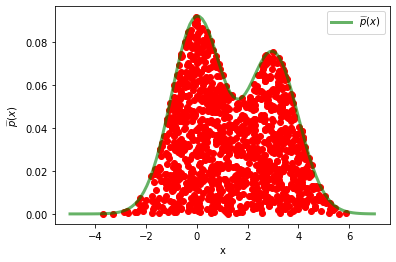

In [11]:
fig, ax = plt.subplots(1, 1)
#ax.plot(x, 2*q(x), lw=3, alpha=0.6, label='2q(x)')
ax.plot(x, p(x)/2, lw=3, alpha=0.6, label=f'{descr_for_density_fun}', color='g')
#ax.plot([2,2], [0,2*q(2)],'r')
#ax.plot([2,2], [0,p(2)],'y')
#ax.scatter(list(zip(*points))[0], list(zip(*points))[1], color='y')
y = np.array(list(zip(*p_points))[1])
ax.scatter(list(zip(*p_points))[0], y/2, color='r')
ax.set_xlabel('x')
ax.set_ylabel(f'{descr_for_density_fun}')
ax.legend()
fig.savefig('1d_rand_5.png')

## Оценим результат моделирования графически

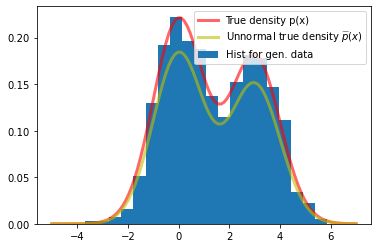

In [15]:
fig, ax = plt.subplots(1, 1)
#ax.plot(x, q(x), lw=3, alpha=0.6, label='q(x)')
ax.plot(x, p(x, 1), lw=3, alpha=0.6, label='True density p(x)', color='r')
ax.plot(x, p(x), lw=3, alpha=0.6, label=f'Unnormal true density ' + f'{descr_for_density_fun}', color='y')
ax.hist(res, density=True, bins=20, label='Hist for gen. data');
ax.legend()